In [3]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib as mpl

In [4]:
sp500 = yf.Ticker("^GSPC")

In [5]:
sp500 = sp500.history(period="max")
sp500

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
...,...,...,...,...,...,...,...
2023-07-06 00:00:00-04:00,4422.620117,4422.620117,4385.049805,4411.589844,3682020000,0.0,0.0
2023-07-07 00:00:00-04:00,4404.540039,4440.390137,4397.399902,4398.950195,3630480000,0.0,0.0
2023-07-10 00:00:00-04:00,4394.229980,4412.600098,4389.919922,4409.529785,3429600000,0.0,0.0


In [6]:
sp500.index

DatetimeIndex(['1927-12-30 00:00:00-05:00', '1928-01-03 00:00:00-05:00',
               '1928-01-04 00:00:00-05:00', '1928-01-05 00:00:00-05:00',
               '1928-01-06 00:00:00-05:00', '1928-01-09 00:00:00-05:00',
               '1928-01-10 00:00:00-05:00', '1928-01-11 00:00:00-05:00',
               '1928-01-12 00:00:00-05:00', '1928-01-13 00:00:00-05:00',
               ...
               '2023-06-28 00:00:00-04:00', '2023-06-29 00:00:00-04:00',
               '2023-06-30 00:00:00-04:00', '2023-07-03 00:00:00-04:00',
               '2023-07-05 00:00:00-04:00', '2023-07-06 00:00:00-04:00',
               '2023-07-07 00:00:00-04:00', '2023-07-10 00:00:00-04:00',
               '2023-07-11 00:00:00-04:00', '2023-07-12 00:00:00-04:00'],
              dtype='datetime64[ns, America/New_York]', name='Date', length=23996, freq=None)

<Axes: xlabel='Date'>

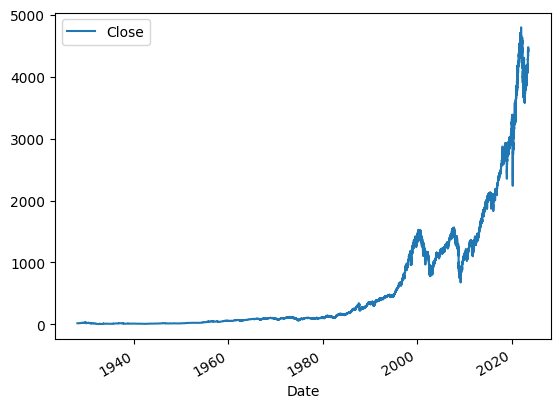

In [7]:
sp500.plot.line(y = "Close", use_index = True)

In [8]:
del sp500["Dividends"]
del sp500["Stock Splits"]

In [9]:
#Can we predict on the days the stock goes up that it will go up aka. checking directionality
sp500["Tomorrow"] = sp500["Close"].shift(-1)
sp500

,Open,High,Low,Close,Volume,Tomorrow
Date,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000
...,...,...,...,...,...,...
2023-07-06 00:00:00-04:00,4422.620117,4422.620117,4385.049805,4411.589844,3682020000,4398.950195
2023-07-07 00:00:00-04:00,4404.540039,4440.390137,4397.399902,4398.950195,3630480000,4409.529785
2023-07-10 00:00:00-04:00,4394.229980,4412.600098,4389.919922,4409.529785,3429600000,4439.259766


In [10]:
#Did the Stock go up from todays ending price and tommrows ending price
sp500["Target"] = (sp500["Tomorrow"] > sp500["Close"]).astype(int)
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000,1
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999,0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999,0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000,1
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000,0
...,...,...,...,...,...,...,...
2023-07-06 00:00:00-04:00,4422.620117,4422.620117,4385.049805,4411.589844,3682020000,4398.950195,0
2023-07-07 00:00:00-04:00,4404.540039,4440.390137,4397.399902,4398.950195,3630480000,4409.529785,1
2023-07-10 00:00:00-04:00,4394.229980,4412.600098,4389.919922,4409.529785,3429600000,4439.259766,1


In [11]:
#Get Rid of data that is too old
sp500 = sp500.loc["1990-01-01":].copy()
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1990-01-02 00:00:00-05:00,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0
1990-01-03 00:00:00-05:00,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0
1990-01-04 00:00:00-05:00,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0
1990-01-05 00:00:00-05:00,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1
1990-01-08 00:00:00-05:00,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0
...,...,...,...,...,...,...,...
2023-07-06 00:00:00-04:00,4422.620117,4422.620117,4385.049805,4411.589844,3682020000,4398.950195,0
2023-07-07 00:00:00-04:00,4404.540039,4440.390137,4397.399902,4398.950195,3630480000,4409.529785,1
2023-07-10 00:00:00-04:00,4394.229980,4412.600098,4389.919922,4409.529785,3429600000,4439.259766,1


In [12]:
#Import Random Forest because they are resistant to over-fit
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators = 1000, min_samples_split=100, random_state=1)

In [13]:
#Split into train and test sets (last 100 and the first 100)
train = sp500.iloc[:-100]
test = sp500.iloc[-100:]

In [14]:
predictors = ["Close", "Volume", "Open", "High", "Low"]
model.fit(train[predictors], train["Target"])

RandomForestClassifier(min_samples_split=100, n_estimators=1000, random_state=1)

In [15]:
#Measure how accurate the model is
from sklearn.metrics import precision_score

preds = model.predict(test[predictors])
preds

array([0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0])

In [16]:
#Checking how accurate the model is
preds = pd.Series(preds, index=test.index)
precision_score(test["Target"], preds)

0.6170212765957447

In [17]:
combined = pd.concat([test["Target"], preds], axis=1)

<Axes: xlabel='Date'>

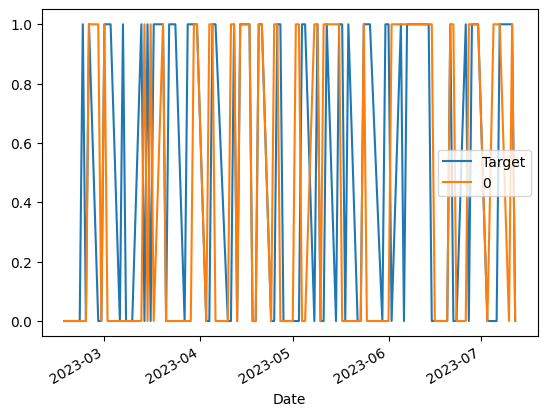

In [18]:
#Orange is prediction Blue is what happened
combined.plot()

In [19]:
#Make a function of what we just did
#1) train the model with the traning data 
#2) Create a predictions array to store the predictions of the model with the test set 
#3) Combine the model into a series
#4) Combine the predictions and what actually happened

def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index = test.index, name = "Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

In [20]:
#Take 10 years of data predict the 11th
#Take 11 years of data predict the 12th
#Take 12 years of data predict the 13th, etc...
def backtest(data, model, predictors, start=2500, step=250):
    all_predictions = []
    
    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)
        
    return pd.concat(all_predictions)

In [21]:
predictions = backtest(sp500, model, predictors)

In [22]:
predictions["Predictions"].value_counts()

Predictions
0    3390
1    2556
Name: count, dtype: int64

In [26]:
#How often the model actually predicted correctly that the market would go up
precision_score(predictions["Target"], predictions["Predictions"])

0.5309076682316118

In [27]:
#Percentages of how often the market actually went up/down
predictions["Target"].value_counts()/predictions.shape[0]

Target
1    0.533972
0    0.466028
Name: count, dtype: float64

In [34]:
horizons = [2, 50, 60, 250, 1000]

new_predictors = []

for horizon in horizons:
    rolling_averages = sp500.rolling(horizon).mean()
    
    ratio_column = f"Close_Ratio_{horizon}"
    sp500[ratio_column] = sp500["Close"] / rolling_averages["Close"]
    
    trend_column = f"Trend_{horizon}"
    sp500[trend_column] = sp500.shift(1).rolling(horizon).sum()["Target"]
    
    new_predictors += [ratio_column, trend_column]

In [36]:
sp500 = sp500.dropna()

In [37]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ration_2,Trend_2,Close_Ration_50,...,Trend_60,Close_Ration_250,Trend_250,Close_Ration_1000,Trend_1000,Close_Ratio_2,Close_Ratio_50,Close_Ratio_60,Close_Ratio_250,Close_Ratio_1000
Date,,,,,,,,,,,,,,,,,,,,,
1993-12-14 00:00:00-05:00,465.730011,466.119995,462.459991,463.059998,275050000,461.839996,0,0.997157,1.0,0.998567,...,32.0,1.028047,127.0,1.176082,512.0,0.997157,0.998567,1.000283,1.028047,1.176082
1993-12-15 00:00:00-05:00,463.059998,463.690002,461.839996,461.839996,331770000,463.339996,1,0.998681,0.0,0.995909,...,32.0,1.025151,126.0,1.172676,512.0,0.998681,0.995909,0.997329,1.025151,1.172676
1993-12-16 00:00:00-05:00,461.859985,463.980011,461.859985,463.339996,284620000,466.380005,1,1.001621,1.0,0.999031,...,32.0,1.028274,127.0,1.176163,513.0,1.001621,0.999031,1.000311,1.028274,1.176163
1993-12-17 00:00:00-05:00,463.339996,466.380005,463.339996,466.380005,363750000,465.850006,0,1.003270,2.0,1.005274,...,32.0,1.034781,128.0,1.183537,514.0,1.003270,1.005274,1.006561,1.034781,1.183537
1993-12-20 00:00:00-05:00,466.380005,466.899994,465.529999,465.850006,255900000,465.299988,0,0.999431,1.0,1.003892,...,32.0,1.033359,128.0,1.181856,513.0,0.999431,1.003892,1.005120,1.033359,1.181856
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07-05 00:00:00-04:00,4442.040039,4454.060059,4436.609863,4446.819824,3482620000,4411.589844,0,0.999015,1.0,1.049072,...,32.0,1.107719,118.0,1.172030,532.0,0.999015,1.049072,1.053506,1.107719,1.172030
2023-07-06 00:00:00-04:00,4422.620117,4422.620117,4385.049805,4411.589844,3682020000,4398.950195,0,0.996023,0.0,1.039415,...,31.0,1.098386,117.0,1.162313,532.0,0.996023,1.039415,1.043912,1.098386,1.162313
2023-07-07 00:00:00-04:00,4404.540039,4440.390137,4397.399902,4398.950195,3630480000,4409.529785,1,0.998565,0.0,1.034841,...,31.0,1.094695,117.0,1.158551,532.0,0.998565,1.034841,1.039732,1.094695,1.158551


In [ ]:
#Changing the model to test it 
model = RandomForestClassifier(n_estimators = 1000, min_sample_split=50, random_split=1)

In [38]:
#Modified
#Make a function of what we just did
#1) train the model with the traning data 
#2) Create a predictions array to store the predictions of the model with the test set 
#3) Combine the model into a series
#4) Combine the predictions and what actually happened

def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict_proba(test[predictors])[:,1]
    preds[preds >= .6] = 1
    preds[preds < .6]= 0
    preds = pd.Series(preds, index = test.index, name = "Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

In [39]:
predictions = backtest(sp500, model, new_predictors)

In [40]:
predictions["Predictions"].value_counts()

Predictions
0.0    4320
1.0     625
Name: count, dtype: int64

In [41]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5744